# Numerical Methods for ODE's: Euler Methods
---

GENERAL PROBLEM: solve the system of first-order ordinary differential equations of the form

\begin{equation}
  \mathbf{y}'(x) \equiv \frac{d}{dx}\mathbf{y}(x) = \mathbf{f}(\mathbf{y}(x),x)
  \quad\text{with}\quad
  \mathbf{y}(x_{0}) = \mathbf{y}_{0}.
\end{equation}


IDEA: discretize variables by letting $x\rightarrow x_{i}$ and $\mathbf{y}(x_{i})\rightarrow \mathbf{y}_{i}$, for $i=0,\ldots,N$. Then use knowledge about $\mathbf{y}_{i}$'s (and possibly derivatives of $\mathbf{y}$) at "earlier" points to approximate (guess) their values at "later" points. An approximate solution is found in this way by "marching" along the independent variable, starting with the given initial values $\mathbf{y}_{0}$ at $x_{0}$.

PRE-REQUISITES:
- [None]

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] Burden and Faires, *Numerical Analysis, 7th edition*.
- [4] LeVeque, *Finite Difference Methods for Ordinary and Partial Differential Equations*.


## 1. Simple Euler Method

To start, consider a first-order ODE with one degree of freedom 

\begin{equation}
  y'(x) = f\left(y(x),x\right)
  \quad,\quad
  \quad\text{with}\quad
  y(x_{0}) = y_{0}.
\end{equation}

Expanding $y(x)$ in a Taylor series about $x_{0}$ gives

\begin{align}
  y(x) &= y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!} y''(x_{0}) + \cdots \\
  &= y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!} y''(\xi),
\end{align}

where the second line is exact, for some value of $\xi$ between $x$ and $x_{0}$. Using the differential equation, we can rewrite this as

\begin{align}
  y(x) &= y(x_{0}) + (x - x_{0})f(y_{0}, x_{0}) + \frac{(x - x_{0})^2}{2!} y''(\xi) \\
  &\approx y(x_{0}) + (x - x_{0})f(y_{0}, x_{0}),
\end{align}


Next we discretize variables by letting $x\rightarrow x_{i}$ and $y(x_{i})\rightarrow y_{i}$, for $i=0,\ldots,N$. Denote the stepsize $x-x_{0}$ by $h$, which we assume to be constant. Then

\begin{align}
  x_{i} &= x_{0} + ih 
  \quad,\quad i = 0,\ldots,N\\
  y_{i+1} &= y_{i} + hf_{i}
  \quad,\quad i = 0,\ldots,N
\end{align}

where $f_{i}\equiv f(y_{i}, x_{i})$. This sets up an iteration scheme. Starting with $x_{0}$ and $y_{0}$, one calculates $f_{0}$, which is then used to calculate $y_{1}$. Then with $x_{1}$ and $y_{1}$ in hand, one repeats this to calculate $y_{2}$, and so on, until the last desired point is reached.





### Local truncation error

Evey time the above approximation is used, a small error results. This error arises due to truncating the Taylor series, and so is called **local trunctation error**.  It is a local source of error, because it arises at one specific step, assuming the solution at the previous step were exact. The local truncation error above is given by

\begin{equation}
  \frac{(x - x_{0})^2}{2!}y''(\xi)
  = \frac{h^2}{2}y''(\xi)
  = O\left(h^2\right).
\end{equation}

The local truncation error is therefore $O(h^2)$, and so the simple Euler method is said to be **second-order accurate**. In general, if the local truncation error of a method is $O(h^p)$, the method is called $p$th-order accurate. (NOTE: terminology here differs across references. See discussion in LeVeque, sections 5.4-5.5.)

### CODE: simple Euler method

In [40]:
# euler step
def euler_step(x, y, f, h):
    """ 
    Evolve solution by one step using Euler's method
    
    INPUT:
    x = current x position
    y = current y values (array)
    f = rhs function handle (takes x and y as arguments)
    h = current stepsize
    
    OUTPUT:
    xnew = new x value
    ynew = new y value
    """
    ynew = y + h*f(x,y)
    xnew = x + h
    return xnew, ynew

### Test: compare to the exact solution

<IPython.core.display.Javascript object>


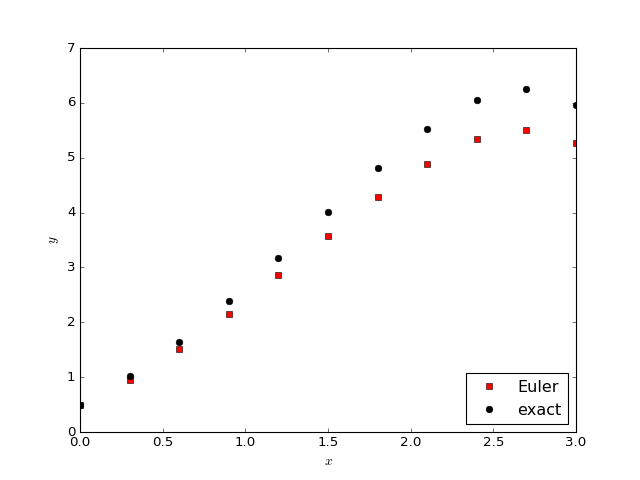

In [5]:
import numpy as np 

# initial conditions
x0 = 0.
y0 = 0.5

# rhs function
def f(x,y):
    return y - x**2 + 1

# create x-grid and step size
xmin = 0.0
xmax = 3.0
nsteps = 10
h = (xmax - xmin)/nsteps
xgrid = np.linspace(xmin, xmax, nsteps+1)

# initialize output arrays
xx = np.zeros_like(xgrid)
yy = np.zeros_like(xgrid)
xx[0] = x0
yy[0] = y0

# numerical solution
for i in range(0, nsteps):
    xx[i+1], yy[i+1] = euler_step(xx[i], yy[i], f, h)

# exact solution
def yexact(x):
    return (x + 1)**2 - 0.5*np.exp(x)

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(1,1)

ax.plot(xx, yy, 'rs', label='Euler')
ax.plot(xx, yexact(xx), 'ko', label='exact')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend(loc="lower right", numpoints=1)

fig.show()

### Test: convergence

(This section follows the excellent discussion in LeVeque, appendix A)

A measure of error $\mathcal{E}(h)$ can be defined over a grid as

\begin{equation}
  \mathcal{E}(h) = ||F(h) - \hat{F}(h)||, 
\end{equation}

where $F(h)$ is the numerical solution, $\hat{F}(h)$ is the true solution, and the norm here can be any of the many available notions of norm (see LeVeque, appendix A). By definition, $\mathcal{E}(h)$ depends on the stepsize $h$. In general, we expect a power law relationship:

\begin{equation}
  \mathcal{E}(h) = C h^p,
\end{equation}

where $C$ is a constant. We can measure the **convergence rate** $p$, by using

\begin{equation}
  \log\left(\mathcal{E}\right) = p\,\log\left(h\right) + \log{C}.
\end{equation}

Plotting $\mathcal{E}$ versus $h$ on a logarithmic scale, the convergence rate $p$ will be the slope of the best-fit line.

For the simple Euler method, we expect $p=2$.

<IPython.core.display.Javascript object>


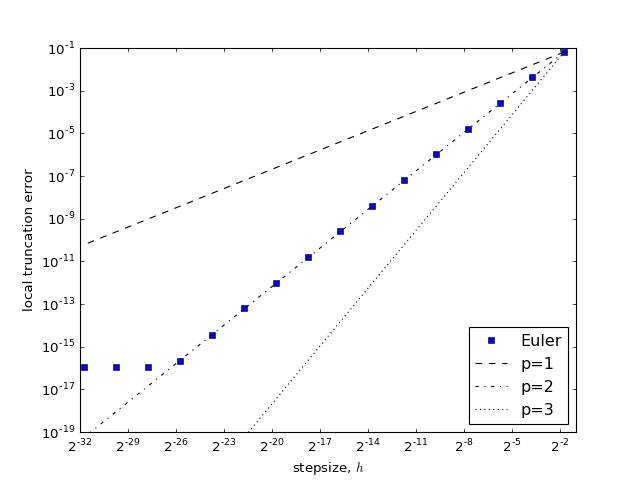

In [12]:
### convergence test ###

# initial conditions
x0 = 0.
y0 = 0.5

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def yexact(x):
    return (x + 1)**2 - 0.5*np.exp(x)

# create bounds of xgrid
xmin = 0.0
xmax = 3.0

# create resolution array
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 30, 16, base=2)
hvals = (xmax - xmin)/nsteps

# initialize local truncation error array
lte = np.zeros_like(hvals)

# calculate one-step error for different resolutions
for i in range(0, len(hvals)):

    # step-size 
    h = hvals[i]
    
    # initialize output arrays
    xx = np.zeros(2)
    yy = np.zeros(2)
    xx[0] = x0
    yy[0] = y0
    
    # numerical solution
    xx[1], yy[1] = euler_step(xx[0], yy[0], f, h)

    # calculate local truncation error
    lte[i] = np.abs(yy[1] - yexact(xx[1]))

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals, lte, 'bs', label='Euler')
ax1.loglog(hvals, lte[0]*(hvals/hvals[0])**1, 'k--', label='p=1')
ax1.loglog(hvals, lte[0]*(hvals/hvals[0])**2, 'k-.', label='p=2')
ax1.loglog(hvals, lte[0]*(hvals/hvals[0])**3, 'k:', label='p=3')
ax1.set_xscale('log', basex=2)
ax1.set_xlabel(r"stepsize, $h$")
ax1.set_ylabel(r"local truncation error")
ax1.set_ylim(1e-19)
ax1.legend(loc="lower right", numpoints=1)
fig.show()

### Test: self-convergence

In general we do not know the exact solution. In that case we use **self convergence** to measure the convergence rate. By definition, the error $\mathcal{E}(h)$ is a function of the stepsize, as is our numerical approximation of the thing we're trying to compute $F(h)$. Therefore we can write

\begin{equation}
  F(h) = F(0) + \mathcal{E}(h),
\end{equation}

where $F(0)$ is the exact solution. By subtracting any two approximations we can eliminate the exact solution. Using the power law dependence

\begin{equation}
  \mathcal{E}(h) = C h^p
\end{equation}

this gives

\begin{align}
  F(h) - F(h/\alpha) 
  &= \left[F(0) + \mathcal{E}(h)\right] - \left[F(0) + \mathcal{E}(h/\alpha)\right] \\
  &= F(0) + C h^p - F(0) - C (h/\alpha)^p \\
  &= C h^p\left(1 - \frac{1}{\alpha^p}\right)
\end{align}

We still do not know the value of the constant $C$. However, we can use a third approximation $F(h/\alpha^2)$ to eliminate it

\begin{align}
  F(h/\alpha) - F(h/\alpha^2)
  &= \left[F(0) + \mathcal{E}(h/\alpha)\right] - \left[F(0) + \mathcal{E}(h/\alpha^2)\right] \\
  &= F(0) + C(h/\alpha)^p - F(0) - C(h/\alpha^2)^p \\
  &= \frac{C h^p}{\alpha^p}\left(1 - \frac{1}{\alpha^p}\right)
\end{align}

and then take the ratio

\begin{equation}
  \frac{F(h) - F(h/\alpha)}{F(h/\alpha) - F(h/\alpha^2)} 
  = \alpha^p
\end{equation}

So the **self-convergence rate** is

\begin{equation}
  p = \log_{\alpha} \left|\frac{F(h) - F(h/\alpha)}{F(h/\alpha) - F(h/\alpha^2)}\right|.
\end{equation}

[Note to simplify the resulting expression, we chose the same ratio $\alpha$ between the first two resolutions as between the last two. A more complicated expression can be obtained without making this assumption.]

The typical choice is $\alpha=2$. In that case 

\begin{equation}
  \frac{F(h) - F(h/2)}{F(h/2) - F(h/4)} 
  = 2^p
\end{equation}

so that the self-convergence rate is

\begin{equation}
  p = \log_{2} \left|\frac{F(h) - F(h/2)}{F(h/2) - F(h/4)}\right|.
\end{equation}

For the simple Euler method, we expect $p=2$.

<IPython.core.display.Javascript object>


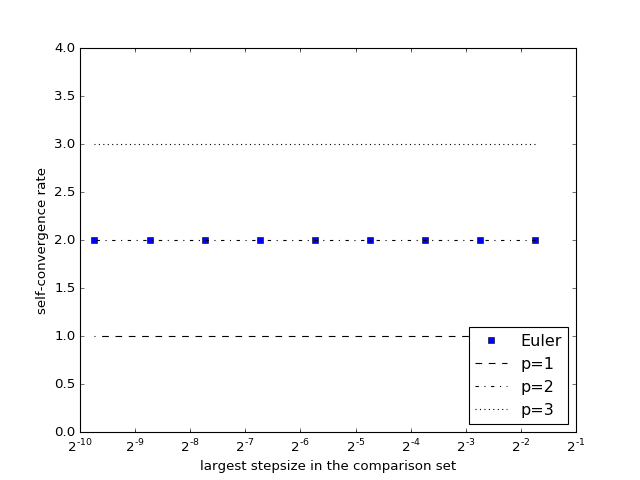

In [39]:
### self-convergence test ###

# initial conditions
x0 = 0.
y0 = 0.5

# rhs function
def f(x,y):
    return y - x**2 + 1

# exact solution
def yexact(x):
    return (x + 1)**2 - 0.5*np.exp(x)

# create bounds of xgrid
xmin = 0.0
xmax = 3.0

# create resolution array
N = 10 #number of steps for the base case, i.e, course resolution
nsteps = N*np.logspace(0, 10, 11, base=2)
hvals = (xmax - xmin)/nsteps

# initialize error arrays
err12 = np.zeros_like(hvals[0:-2])
err24 = np.zeros_like(err12)
ratio = np.zeros_like(err12)

# calculate one-step error for different resolutions
for i in range(0, len(hvals)-2):

    # define three different stepsizes (resolutions)
    h1 = hvals[i]
    h2 = hvals[i+1]
    h4 = hvals[i+2]
        
    # numerical solutions at the three different resolutions
    x1, y1 = euler_step(x0, y0, f, h1)
    x2, y2 = euler_step(x0, y0, f, h2)
    x4, y4 = euler_step(x0, y0, f, h4)

    # calculate errors and ratio
    err12[i] = y1 - y2
    err24[i] = y2 - y4
    ratio[i] = np.abs(err12[i]/err24[i])

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.loglog(hvals[0:-2], ratio, 'bs', label='Euler')
ax1.loglog(hvals[0:-2], np.ones_like(ratio), 'k--', label='p=1')
ax1.loglog(hvals[0:-2], 2*np.ones_like(ratio), 'k-.', label='p=2')
ax1.loglog(hvals[0:-2], 3*np.ones_like(ratio), 'k:', label='p=3')
ax1.set_xscale('log', basex=2)
ax1.set_yscale('linear')
ax1.set_ylim(0,4)
ax1.set_xlabel(r"largest stepsize in the comparison set")
ax1.set_ylabel(r"self-convergence rate")
ax1.legend(loc="lower right", numpoints=1)
fig.show()

In [22]:
hvals[:]

array([  3.00000000e-01,   7.50000000e-02,   1.87500000e-02,
         4.68750000e-03,   1.17187500e-03,   2.92968750e-04,
         7.32421875e-05,   1.83105469e-05,   4.57763672e-06,
         1.14440918e-06,   2.86102295e-07,   7.15255737e-08,
         1.78813934e-08,   4.47034836e-09,   1.11758709e-09,
         2.79396772e-10])